<a id='top'></a>

# Peru World Cup Events Data Analysis 
Last updated: 26/04/2020

![title](img/fifaworldcup2018_2.jpg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

## Introduction
This notebook is a short Exploratory Data Analysis (EDA) of Football Events data using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](img/fifa20eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb). The accompanying Microsoft Excel workbook that can be used to track a tournment for up to 24 players can be downloaded [here](https://www.eddwebster.com/downloads/fifa_20_fantasy_football_league.xlsm).

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Loading in and Investigation the Data](#section3)<br>
      3.1.   [Downloading data](#section3.1)<br>
      3.2.   [Organising working folder](#section3.2)<br>
      3.3.   [Loading in data](#section3.3)<br>
      3.4.   [What is a json file?](#section3.4)<br>
      3.5.   [Using ‘for’ loops](#section3.5)<br>
      3.6.   [Using ‘if’ statements](#section3.6)<br>
      3.7.   [Identifying specific matches in Statsbomb data](#section3.7)<br>
4.    [Making Your Own Shot and Pass Maps](#section4)<br>
      4.1.   [Loading match data jsons](#section4.1)<br>
      4.2.   [Finding all the hosts in match data](#section4.2)<br>
      4.3.   [Plotting a pitch](#section4.3)<br>
      4.4.   [Plotting shots on the pitch](#section4.4)<br>
      4.5.   [Highlighting goals](#section4.5)<br>
      4.6.   [Plotting expected goals](#section4.6)<br>
      4.7.   [Plotting passes](#section4.7)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
6.    [Summary](#section6)<br>
7.    [Bibliography](#section7)<br>

<a id='section1'></a>

## 1. Notebook Dependencies

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations,
*    [glob](https://docs.python.org/3/library/glob.html) for reading multiple CSVs to create one single DataFrame, and
*    [os](https://docs.python.org/3/library/os.html) module, which provides a portable way of using operating system dependent functionality.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import platform
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os    #  used to read the csv filenames
import re
import random

# Working with JSON
import json
from pandas.io.json import json_normalize

# Football libraries
## from FCPython import createPitch

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## plt.style.use('seaborn-whitegrid')
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import OffsetImage
import missingno as msno    # not include with Conda, 'pip install missingno' in the terminal if you don't have it

import squarify    # pip install squarify
from functools import reduce

# Machine Learning
import scipy as sp

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('SciPy: {}'.format(sp.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0
SciPy: 1.4.1


<a id='section2'></a>

## 2. Project Brief
This workbook looks at how to load in and manipulate football data (json files) from the StatsBomb repository into a Jupyter notebook.

<a id='section3'></a>

## 3. Loading in and investigating the data

<a id='section3.1'></a>

### 3.1. Introduction
The data has comes from StatsBomb.

This section uses the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

The learning goals for this video are:
1.    Downloading code
2.    Downloading data
3.    Organising working folder
4.    Loading in data
5.    What is a json file?
6.    Using ‘for’ loops
7.    Using ‘if’ statements
8.    Identifying specific matches in Statsbomb data

<a id='section3.2'></a>

### 3.2. Read in the JSON

In [3]:
# Set up initial path to data
dataDir = r'data/'

In [4]:
# Load the Statsbomb competition file
with open(dataDir + 'statsbomb/competitions.json') as f:
    competitions = json.load(f)

In [5]:
competitions

[{'competition_id': 37,
  'season_id': 42,
  'country_name': 'England',
  'competition_name': "FA Women's Super League",
  'competition_gender': 'female',
  'season_name': '2019/2020',
  'match_updated': '2020-03-11T14:09:41.932138',
  'match_available': '2020-03-11T14:09:41.932138'},
 {'competition_id': 37,
  'season_id': 4,
  'country_name': 'England',
  'competition_name': "FA Women's Super League",
  'competition_gender': 'female',
  'season_name': '2018/2019',
  'match_updated': '2020-02-27T15:59:58.148',
  'match_available': '2020-02-27T15:59:58.148'},
 {'competition_id': 43,
  'season_id': 3,
  'country_name': 'International',
  'competition_name': 'FIFA World Cup',
  'competition_gender': 'male',
  'season_name': '2018',
  'match_updated': '2019-12-16T23:09:16.168756',
  'match_available': '2019-12-16T23:09:16.168756'},
 {'competition_id': 11,
  'season_id': 4,
  'country_name': 'Spain',
  'competition_name': 'La Liga',
  'competition_gender': 'male',
  'season_name': '2018/201

In [6]:
# Men's World Cup 2018 has competition ID 43
competition_id = 43

In [7]:
# Load the list of  matches for this competition
with open('data/statsbomb/matches/' + str(competition_id) + '/3.json') as f:
    matches = json.load(f)

In [8]:
# View contents of the match JSON file, commented out as it's long
# matches

In [9]:
# See the first match in the dataset - Peru vs. Australia
matches[0]

{'match_id': 7562,
 'match_date': '2018-06-26',
 'kick_off': '16:00:00.000',
 'competition': {'competition_id': 43,
  'country_name': 'International',
  'competition_name': 'FIFA World Cup'},
 'season': {'season_id': 3, 'season_name': '2018'},
 'home_team': {'home_team_id': 792,
  'home_team_name': 'Australia',
  'home_team_gender': 'male',
  'home_team_group': 'Group C',
  'country': {'id': 14, 'name': 'Australia'},
  'managers': [{'id': 630,
    'name': 'Bert van Marwijk',
    'nickname': None,
    'dob': '1952-05-19',
    'country': {'id': 160, 'name': 'Netherlands'}}]},
 'away_team': {'away_team_id': 784,
  'away_team_name': 'Peru',
  'away_team_gender': 'male',
  'away_team_group': 'Group C',
  'country': {'id': 179, 'name': 'Peru'},
  'managers': [{'id': 629,
    'name': 'Ricardo Alberto Gareca Nardi',
    'nickname': None,
    'dob': '1958-02-10',
    'country': {'id': 11, 'name': 'Argentina'}}]},
 'home_score': 0,
 'away_score': 2,
 'match_status': 'available',
 'last_updated':

In [10]:
# See the away team for the first match in the dataset
matches[0]['away_team']

{'away_team_id': 784,
 'away_team_name': 'Peru',
 'away_team_gender': 'male',
 'away_team_group': 'Group C',
 'country': {'id': 179, 'name': 'Peru'},
 'managers': [{'id': 629,
   'name': 'Ricardo Alberto Gareca Nardi',
   'nickname': None,
   'dob': '1958-02-10',
   'country': {'id': 11, 'name': 'Argentina'}}]}

In [11]:
# See the away team name for the first match in the dataset
matches[0]['away_team']['away_team_name']

'Peru'

Print out the result list for the Mens World Cup

In [12]:
# Print all the match results
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    home_score = match['home_score']
    away_score = match['away_score']
    describe_text = f"The match between {home_team_name} and {away_team_name}"
    result_text = f" finished {home_score} : {away_score}"
    print(describe_text + result_text)

The match between Australia and Peru finished 0 : 2
The match between Nigeria and Iceland finished 2 : 0
The match between Serbia and Brazil finished 0 : 2
The match between Croatia and Denmark finished 1 : 1
The match between Iran and Portugal finished 1 : 1
The match between Mexico and Sweden finished 0 : 3
The match between Brazil and Costa Rica finished 2 : 0
The match between Germany and Mexico finished 0 : 1
The match between Portugal and Spain finished 3 : 3
The match between Russia and Egypt finished 3 : 1
The match between Switzerland and Costa Rica finished 2 : 2
The match between Panama and Tunisia finished 1 : 2
The match between England and Belgium finished 0 : 1
The match between France and Belgium finished 1 : 0
The match between Belgium and England finished 2 : 0
The match between Iran and Spain finished 0 : 1
The match between Uruguay and Russia finished 3 : 0
The match between Croatia and Nigeria finished 2 : 0
The match between Brazil and Belgium finished 1 : 2
The m

Show just Peru's results in the World Cup

In [13]:
# Print match results involving Peru
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if home_team_name == 'Peru' or away_team_name == 'Peru':
        home_score = match['home_score']
        away_score = match['away_score']
        describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
        result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
        print(describe_text + result_text)

The match between Australia and Peru finished 0 : 2
The match between France and Peru finished 1 : 0
The match between Peru and Denmark finished 0 : 1


Find the match ID for the game we are interested in - France vs. Peru

In [14]:
# Now lets find the match we are interested in - France vs. Peru
home_team_required = "France"
away_team_required = "Peru"

In [15]:
# Find ID for the match we are interested in - France vs. Peru
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if (home_team_name == home_team_required) and (away_team_name == away_team_required):
        match_id_required = match['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id: ' + str(match_id_required))

France vs Peru has id: 7546


<a id='section4'></a>

## 4. Drawing a football pitch
At first, let us use Matplotlib to draw a simple football pitch.

In [16]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

That seems a lot, but let’s unpack the draw_pitch() function line by line. The function takes in an ax argument, which is the output of the add_subplot() function in Matplotlib. It then adds several objects with pre-defined dimension to recreate an image of a football pitch, including the center circle, the penalty areas, the 6-yard boxes, and the arcs in the pitch. Once we have defined this function, we call in together with standard Matplotlib figure function as follows:

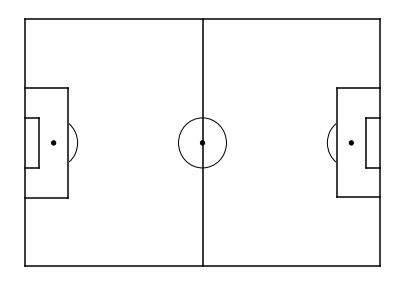

In [17]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
plt.show()

<a id='section5'></a>

## 5. Plotting a Pass Maps and Heat Maps using Event Data from StatsBomb
This section uses the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame and [matplotlib](https://matplotlib.org/) for data visualisation.

The learning goals for this video are:
1.   Loading match data jsons
2.   Finding all the hosts in match data
3.   Plotting a pitch
4.   Plotting shots on the pitch
5.   Highlighting goals
6.   Plotting expected goals
7.   Plotting passes

### What is Event Data (and what it is not)
Event Data is effectively chronological event-by-event tabulation of on-ball actions. It's typically collected from broadcast footage by third-party collectors and sold on the open market to clubs, broadcasters, the gambling industry, and even private individuals. The primary companies competing in this space are Opta (now owned by STATS Perform) and StatsBomb, but there are other competitors.

Event data does not include records of the oordinate positions and actions of the remaining 23 players on the field, only the player in possession. For this. we need Tracking Data. Player tracking systems record the coordinate position of every player on the field (and usually the ball), many times per second. State-of-the-art systems collect up to 25 samples-per-second. Because these systems are expensive to install and operate, and require in-stadium hardware, this data is mostly available to the clubs themselves, but academics frequently get their hands on this data in a highly anonymized format through tediously painful research agreements. There are various competitors in this space, such as ChyronHego, Second Spectrum, STATS Perform, Metrica, Signality, and others.

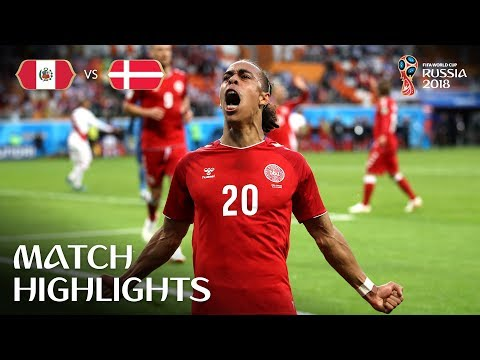

In [18]:
# France vs. Peru highlights, Match 21
YouTubeVideo('O4odLCih0Os')

The game we'll be analysing is Peru vs. Denmark. Peru had 17 shots in this game, the most by a team without scoring at that point in the competition of the 2018 World Cup. Unforunately, after a Cueva missed penalty, Peru lost 1-0 to a Poulson finish.

Let’s start with a Pass Map

We load the json file and do some basic data cleaning in Panda to get a dataset that only contains Passing Events by André Carrillo.

In [19]:
match_id_peru_denmark = 7532

# Load in the json data
file_name = str(match_id_peru_denmark) + '.json'

# Load in all the match events
with open(dataDir + 'statsbomb/events/' + file_name) as data_file:
    # print (mypath + 'events/' + file)
    data = json.load(data_file)

In [20]:
# Get the nested structure into a DataFrame
df = pd.json_normalize(data, sep = "_").assign(match_id = file_name[:])

# DataFrame of Carrillo's actions on the pitch
carrillo_pass = df[(df['type_name'] == "Pass") & (df['player_name'] == 'André Martín Carrillo Díaz')]   # get passing information of Carrillo
carrillo_column = [i for i in df.columns if i.startswith("pass")]
carrillo_pass = carrillo_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
carrillo_pass.head(60)

,id,period,timestamp,location,pass_end_location,pass_recipient_name
104,11e27ac5-6e0f-485a-a600-f4f40a7ccefd,1,00:01:35.280,"[97.0, 66.0]","[104.0, 65.0]",NaN
113,04b9366f-595a-4dea-a5fd-1e43d7a9363d,1,00:01:43.200,"[82.0, 58.0]","[75.0, 59.0]",Renato Fabrizio Tapia Cortijo
140,36aae18b-b605-486e-8a4a-3a1e730853be,1,00:02:28.440,"[66.0, 55.0]","[62.0, 55.0]",Renato Fabrizio Tapia Cortijo
209,24dd6505-a3dc-49f1-8eae-6f1c5d862c27,1,00:04:45.360,"[94.0, 24.0]","[100.0, 21.0]",Christian Alberto Cueva Bravo
272,f62464bf-60f4-4367-88e9-ae90cf31da48,1,00:06:43.080,"[101.0, 63.0]","[89.0, 69.0]",Christian Alberto Cueva Bravo
413,fb1be5f8-ad4c-4d75-925b-5cf43f9d34ff,1,00:10:19.800,"[96.0, 50.0]","[97.0, 68.0]",Luis Jan Piers Advíncula Castrillón
420,6112273b-5145-46c9-a511-aa3289129d14,1,00:10:26.400,"[92.0, 55.0]","[102.0, 50.0]",Christian Alberto Cueva Bravo
430,b4c3318a-4640-4ec2-8c3c-589cd1208e8e,1,00:10:46.960,"[82.0, 61.0]","[83.0, 54.0]",Renato Fabrizio Tapia Cortijo
553,a352ab6a-48c0-4eb8-825a-ba424bb0f048,1,00:13:20.360,"[46.0, 68.0]","[48.0, 63.0]",Renato Fabrizio Tapia Cortijo
615,85d67434-ee96-40c8-9fee-8ef3e5bd336e,1,00:15:19.560,"[38.0, 58.0]","[62.0, 53.0]",Christian Alberto Cueva Bravo


The dataset shows that Carillo attempted x passes. This shows that... 

For the purpose of the pass map, we only care about the starting and ending location of a pass.

The code below allows us to overlay the passes as arrows onto our pitch.

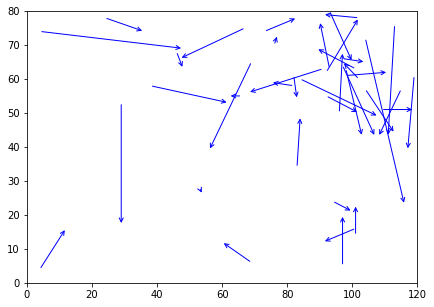

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(carrillo_pass)):
    # can also differentiate by color
    color = "blue" if carrillo_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (carrillo_pass.iloc[i]['pass_end_location'][0], carrillo_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (carrillo_pass.iloc[i]['location'][0], carrillo_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

<a id='section6'></a>

## 6. Drawing a Heatmap
Football heatmaps are used by in-club and media analysts to illustrate the area within which a player has been present. They are effectively a smoothed out scatter plot of player locations and could be a good indicator of how effective a player is at different parts of the field. While there may be some debate as to how much they are useful (they don’t tell you if actions/movement are a good or bad thing!), they can often be very aesthetically pleasing and engaging, hence their popularity.

Let’s plot a heat map using Seaborn on top of Matplotlib to visualize André Carrillo's involvement during 90-minute of the Peru-Denmark match. The syntax of the code is incredibly simple. We use a kdeplot, which will draw a kernel density estimate of the scattering points of Carrillo's locations.

In [22]:
# extract players involvement in the entire game
carrillo_action = df[(df['player_name'] == 'André Martín Carrillo Díaz')][["id", "type_name","period", "timestamp", "location"]]
carrillo_action.head()

,id,type_name,period,timestamp,location
71,e8bfc033-a4d9-46e4-8617-4605cf0f99a7,Ball Recovery,1,00:01:02.080,"[47.0, 31.0]"
102,ef5d9fef-e678-4d93-8f38-6068f68749a4,Ball Receipt*,1,00:01:31.000,"[73.0, 77.0]"
103,1fe02959-3210-46d4-9351-58bddfc914a1,Carry,1,00:01:31.000,"[73.0, 77.0]"
104,11e27ac5-6e0f-485a-a600-f4f40a7ccefd,Pass,1,00:01:35.280,"[97.0, 66.0]"
109,1bc0199e-714d-4d1b-994b-705018af7da7,Ball Receipt*,1,00:01:41.160,"[84.0, 62.0]"


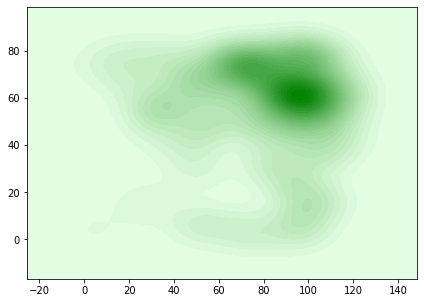

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in carrillo_action["location"]]
y_coord = [i[1] for i in carrillo_action["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

Wow!!! That looks very… anti-climatic. After all, what is the graph trying to tell you? I see some coordinates, and clearly these contour-looking plots does seem to indicate that Özil is more active in the area with darker color.

Can we do any better than that?

Yes, the answer is that we can combine (1) the pitch, (2) the pass map and (3) the heat map in order to have a more comprehensive views of Ozil’s performance during the game

We now put both the heat map and the pass map together, with a nice pitch at the background.

In [24]:
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name'] == player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80)    # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

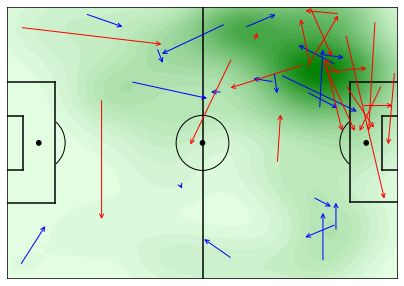

In [25]:
heat_pass_map(df, 'André Martín Carrillo Díaz')

# we can see that ...

# ex. Ozil really struggles to play direct attacking ball in the first half, while he was a lot more direct in the second half

Notice that I also color the passes differently, as the blue arrows indicate passes made in the first half, and the red arrows second half

Now we can see a more comprehensive picture of Mesut Özil’s performance during the game. A couple of observations right off the bat:
*    He covered almost exclusively the opponent’s half, so criticisms against his lack of defensive mindset are not completely unfounded. But the question is, is he expected to win 1–1 and recover the ball as a CAM?
*    He made a lot more forward and direct passes in the second half, contrasting a larger number of more conservative, backward-looking passes made in the first half. There could be two reasons: (1) there is a general sense of urgency within the Germany team in the second half (2) the introduction of Mario Gómez as a Central Forward really produced an outlet for Özil’s key passes, as we see a total of 6 passes directly into the penalty area, three times as many as he did in the first half.

What I found interesting was the heat-pass map of Timo Werner, who started out as the lone striker for the Germany team then paired up with Mario Gomez for much of the second half.

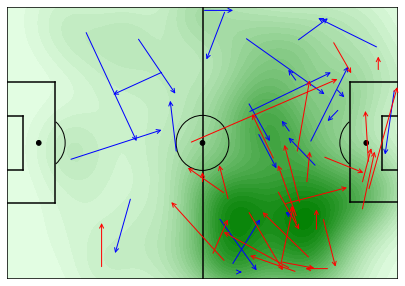

In [26]:
heat_pass_map(df, 'Christian Alberto Cueva Bravo')

He surprisingly spent a lot of his time on the two sides, while you would expect the Central Forward to occupy the space in the 18-yard box a lot more. This partly explains the ineffectiveness of German offensive line during the game, as their forward lines (Werner, Reus, Goretzka and then Muller, Gómez) crowd up at the wings but fail to take up space in the penalty area, thus providing very little outlet for playmakers such as Özil and Kroos to direct the ball into the 18-yard box.

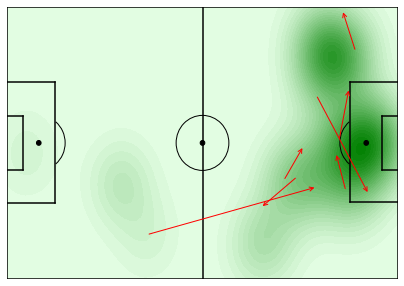

In [27]:
heat_pass_map(df, 'José Paolo Guerrero González')

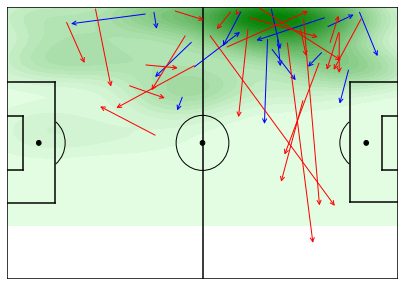

In [28]:
heat_pass_map(df, 'Luis Jan Piers Advíncula Castrillón')

### Plot of Shots

We can again attempt to visualize all shots from the Peru team to decide whether the majority of their goals come from outside or inside the box?

If I just follow the methods shown thus far, this is what I get

I want to plot out the shots from all different angles of the Peru team at the World Cup.

In [29]:
data_id = [7562, 7546, 7532]

# consequently read the json and concatenate into a pre-defined dataframe
all_peru = pd.DataFrame()
for i in data_id:
    with open(dataDir + 'statsbomb/events/' + str(i) + '.json') as data_file:
        data = json.load(data_file)
    df = pd.json_normalize(data, sep = '_')
    if all_peru.empty:
        all_peru = df
    else:
        all_peru = pd.concat([all_peru, df], join = 'outer', sort = False)

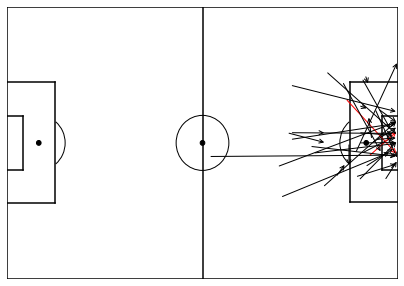

In [30]:
shot_data = all_peru[(all_peru['type_name'] == "Shot") & (all_peru['team_name'] == 'Peru')]

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # can also differentiate different half by different color
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle = "->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

Shot taken by France team during the World Cup campaign

This is fine. But we can do more to make the visualization more engaging and insightful. Specifically, I made two small tweaks:
1.    Since we only focus on the shots, which are all recorded at one side of the pitch, I will draw only the right half of the pitch
2.    Since we only care about the starting points of the shots, we can toss away the arrows and only visualize shots as scatter plots where x, y are location at which the shot were attempted.

In [31]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

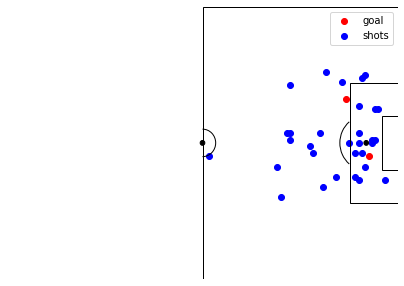

In [32]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.show()

Now this looks a whole lot better. We can see right away that France attempted as many shot inside the boxes as they did outside the penalty area. Although to a certain extent, it does support the argument that France did take a lot more long-range efforts than usual, as we would expect a much lower density of shots outside the box. In any case, it does look interesting how they seems equally clinical with the short and long-range efforts.

In the following sections, we'll overlaying a density plot and including an image to the visualization. With a couple more lines of code, you can easily produce this visualization:

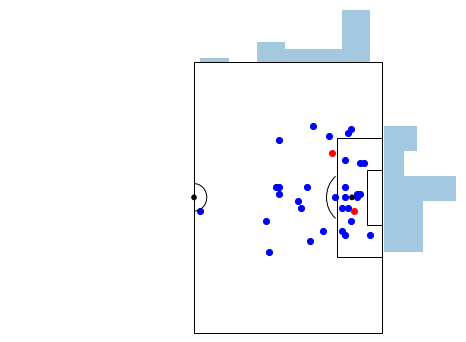

In [33]:
# we use a joint plot to see the density of the shot distribution across the 2 axes of the pitch
joint_shot_chart = sns.jointplot(x_coord, y_coord, stat_func=None,
                                 kind = 'scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint

# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)

# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]

# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]

# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)
plt.axis('off')
plt.show()

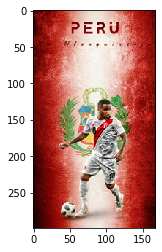

In [34]:
# I want to include some images into our diagram
peru = plt.imread("./img/farfanicon.png")
plt.imshow(peru)
plt.show()

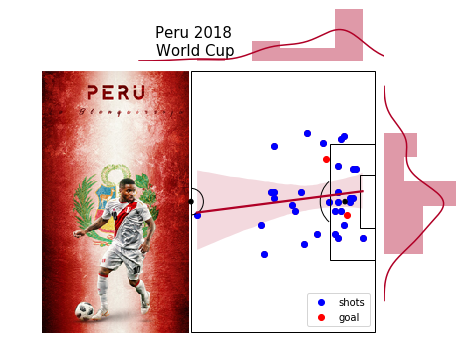

<Figure size 432x288 with 0 Axes>

In [51]:
cmap = plt.cm.YlOrRd_r    # import cmap
joint_shot_chart = sns.jointplot(x_coord, y_coord, stat_func=None,
                                 kind='reg', space=0, color = cmap(0.1))
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)

# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]

# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]

# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
plt.legend(loc='lower right', bbox_to_anchor=(0.975, 0.0125))    # legend location specifically put here
plt.axis('off')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Peru 2018 \nWorld Cup', 
             y=1.2, fontsize=15)
joint_shot_chart.ax_marg_x.set_axis_off()
joint_shot_chart.ax_marg_y.set_axis_off()
img = OffsetImage(peru, zoom=0.873)
img.set_offset((42,15.5)) # play around with the coordinate until I found a good place

# Add image of Farfan
ax.add_artist(img)
ax.set_axis_off()
plt.xlim(0,123)
plt.ylim(-.5, 83)
plt.axis('off')
plt.show()

# Export plot - not working currently
# plt.savefig('./img/fig/peru_all_shots_graphic.png')

<a id='section7'></a>

## 7. Tree Map for all Peru Matches

In [39]:
data_id = [7562, 7546, 7532]
# consequently read the json and concatenate into a pre-defined dataframe

peru_all = pd.DataFrame()
for i in data_id:
    with open(dataDir + 'statsbomb/events/' + str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_peru.empty:
        peru_all = df
    else:
        peru_all = pd.concat([peru_all, df], join = 'outer', sort = False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [40]:
peru_all = peru_all[peru_all.team_name == "Peru"]

Let's say we are interested in the following statistics per player across the tournament
*    Total number of dribbles
*    Total number of completed dribbles
*    Total number of passes
*    Total number of failed passes
*    Total number of dispossession

In [42]:
# count total number of dribble
total_dribble = peru_all.groupby('player_name')['type_name'].apply(lambda x:(x=='Dribble').sum()).reset_index(name='total_dribble')

# number of dribble completed
dribble_complete= peru_all.groupby('player_name')['dribble_outcome_name'].apply(lambda x: (x=='Complete').sum()).reset_index(name='dribble_completed')

# total number of pass
total_pass = peru_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Pass').sum()).reset_index(name='total_pass')

# number of incomplete pass
pass_incomplete = peru_all.groupby('player_name')['pass_outcome_name'].count().reset_index(name='incomplete_pass')

# number of times being dispossessed
dispossessed = peru_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Dispossessed').sum()).reset_index(name='dispossessed')

In [43]:
df_list = [total_dribble, dribble_complete, total_pass, pass_incomplete, dispossessed]
summary_data = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), df_list)
summary_data

,player_name,total_dribble,dribble_completed,total_pass,incomplete_pass,dispossessed
0,Alberto Junior Rodríguez Valdelomar,1,0,56,7,0
1,Anderson Santamaría Bardales,1,1,74,5,0
2,André Martín Carrillo Díaz,18,14,106,28,6
3,Christian Alberto Cueva Bravo,4,3,138,25,4
4,Christian Guillermo Martín Ramos Garagay,2,2,119,20,1
5,Christopher Paolo César Hurtado Huertas,1,1,19,3,0
6,Jefferson Agustín Farfán Guadalupe,2,2,33,5,2
7,José Paolo Guerrero González,3,0,48,18,5
8,Luis Jan Piers Advíncula Castrillón,8,7,144,20,2
9,Miguel Ángel Trauco Saavedra,3,2,203,47,4


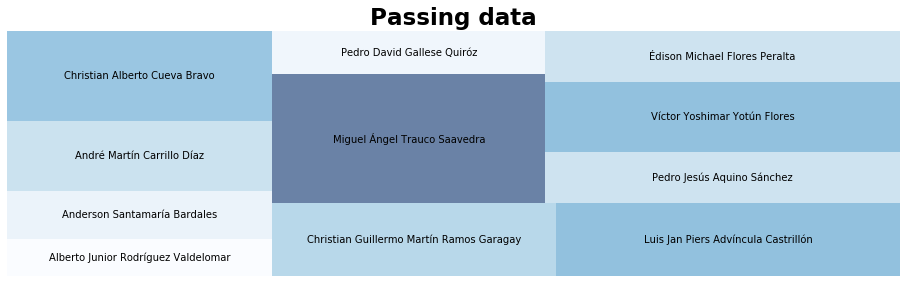

In [46]:
# New dataframe, containing only players with more than 50 passes
dataPass= summary_data[summary_data["total_pass"]>50]

# Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = mpl.colors.Normalize(vmin=min(dataPass.total_pass), vmax=max(dataPass.total_pass))
colors = [mpl.cm.Blues(norm(value)) for value in dataPass.total_pass]

# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataPass.player_name,sizes=dataPass.total_pass, color = colors, alpha=.6)
plt.title("Passing data",fontsize=23,fontweight="bold")

# Remove our axes and display the plot
plt.axis('off')
plt.show()

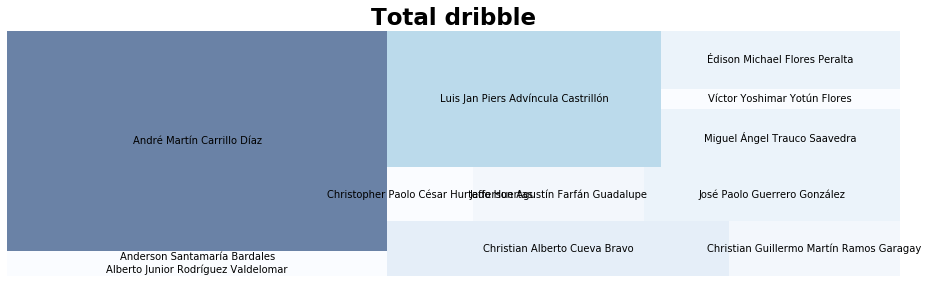

In [47]:
dataDribble= summary_data[summary_data["total_dribble"]>0]

# Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = mpl.colors.Normalize(vmin=min(dataDribble.total_dribble), vmax=max(dataDribble.total_dribble))
colors = [mpl.cm.Blues(norm(value)) for value in dataDribble.total_dribble]

# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataDribble.player_name,sizes=dataDribble.total_dribble, color = colors, alpha=.6)
plt.title("Total dribble",fontsize=23,fontweight="bold")

# Remove our axes and display the plot
plt.axis('off')
plt.show()

<a id='section6'></a>

## 8. Summary

This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [matplotlib](https://matplotlib.org/)  to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:


To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [matplotlib](https://matplotlib.org/) for data visualisation,

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    [os.path.basename(path)](https://docs.python.org/3/library/os.path.html) function to read the filenames of the csv files,
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset,
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files,
*    The pandas [.groupby()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to group the data,
*    [Lambda Expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions), and
*    The pandas [pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method to reshape the DataFrame from a long DataFrame to a wide DataFrame.

<a id='section7'></a>

## 9. Bibliography

*    Setting Up to do Data Science: https://www.youtube.com/watch?v=FZ_XTfezCH4
*    Loading in and investigating World Cup data in Python: https://www.youtube.com/watch?v=GTtuOt03FM0
*    Code to create a function that draws a football pitch in Python from FCPython: https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
*    [Drawing a Pitchmap – Adding Lines & Circles in Matplotlib](https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib)
*    [Drawing a Pass Map in Python](https://fcpython.com/visualisation/drawing-pass-map-python)
*    [Advanced sports visualization with Python, Matplotlib and Seaborn](https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b). See the accompanying GitHub code [here](https://github.com/tuangauss/DataScienceProjects/blob/master/Python/football_visual.ipynb).
*    [Peru v Denmark Match Report](https://www.goal.com/en/match/peru-v-denmark/report/48v2zgrdav6wmog0wwbiowu7d)

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)